
**Autoencoders** are a type of Unsupervised Neural Network that compresses the input into a **latent-space representation**(contains latent variables extracted from the input data) and, then reconstructs the output from this latent representation with some loss known as Reconstruction Error 

Architecture of an Autoencoder consists of:

- **Encoder** - Learns how the data is structured and compresses it into latent-space representation (s)
- **Code** - Represents the Compressed Input which is fed to the **Decoder**
- **Decoder** - Reconstructs the Input from the Latent Space Representation

**Autoencoders** are widely used with the image data and some of their use cases are:

- **Image Compression**

- **Image Denoising**

- **Dimensionality Reduction**

- **Image Generation**

- **Feature Extraction**


# **Image Denoising using an Autoencoder**



###**Problem Statement**

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike

As a Deep Learning Engineer, your goal is to reconstruct digits images from a dataset of thousands of handwritten images using an **Autoencoder** 

###**Tasks to be Performed**

- Import the Required Libraries, Load, Analyze, and Visualize the Dataset - Beginner
- Pre-process the dataset - Intermediate

         Normalize all the values between 0 and 1 
         Induce Salt and Pepper Noise to the Images and then, visualize the noisy images

- Build & Train Auto-Encoder Deep Learning Model - Advance
- Evaluating the Trained Model Performance - Beginner
- Visualize the Denoised Images using Matplotlib - Intermediate



###**Dataset Description**

The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



###**Topics Covered**

- TensorFlow 2.x
- Autoencoders


###**Question 1:** 

Import the Required Libraries, Load, Analyze, and Visualize the Dataset

In [ ]:
#Importing Required Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

#Latest Version of Tensorflow
print(tf.__version__)

2.2.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading the Dataset

(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

From above, you can see that the data set contains **60000** images of 28 x 28 pixels

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

From above, you can see that we have **60000** labels for corresponding images

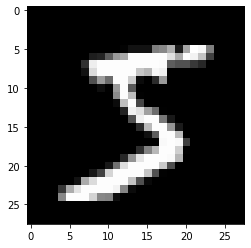

In [ ]:
#Visualize a Sample Image

plt.imshow(X_train[0], cmap = 'gray')
plt.show()

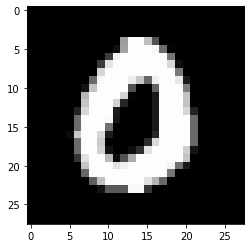

In [ ]:
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap = 'gray')
plt.show()

In [ ]:
label = y_train[i]
label

0

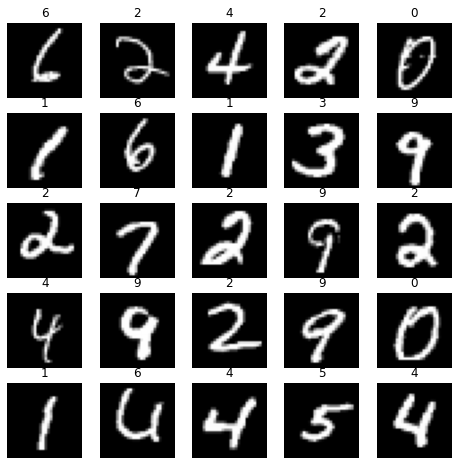

In [ ]:
#Defining the dimensions of the plot grid
wid1 = 5
len1 = 5 

fig, axes = plt.subplots(len1, wid1, figsize=(8,8))

axes = axes.ravel()#Flattens the matrix into arrays

n_training = len(X_train)#Length of the Training Data set

#Selecting a random number from 0 to n_training

for i in np.arange(0, wid1 * len1):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

###**Question 2 :**

Pre-process the dataset

- Normalize all the values between 0 and 1 
- Induce **Salt and Pepper** Noise to the Images and then, visualize the noisy images

In [ ]:
#Normalizing the Data

X_train = X_train/255
X_test = X_test/255

In [ ]:
#X_train

Noisy Images

We are intentionally introducing the noise in the images using **[imaug](https://imgaug.readthedocs.io/en/latest/)** package which can be used to augment the images with different variations. One such variation can be introduction of noise. 

Different types of noises can be added to the images such as:

- **Salt and Pepper Noise**
- **Gaussian Noise**
- **Periodic Noise**
- **Speckle Noise**

We will introduce **Salt and Pepper** noise to our data which is also known as impulse noise.

- It introduces sharp and sudden disturbances in the image signal 
- It presents itself as sparsely occurring white and black pixels



In [ ]:
#Adding Noise to the Dataset

from imgaug import augmenters 

# imgaug is a library for image augmentation in machine learning experiments. It supports a wide range of augmentation techniques

noise = augmenters.SaltAndPepper(0.1) #Replaces 10% of all pixels with salt and pepper noise
seq_object = augmenters.Sequential([noise]) # It is simply a list of other augmenters

train_x_n = seq_object.augment_images(X_train * 255) / 255 #augment_images augments a batch of images
val_x_n = seq_object.augment_images(X_test * 255) / 255

If you want to learn more about **Salt and Pepper** Noise, **[Click Here!](https://imgaug.readthedocs.io/en/latest/source/api_augmenters_arithmetic.html#imgaug.augmenters.arithmetic.SaltAndPepper)**

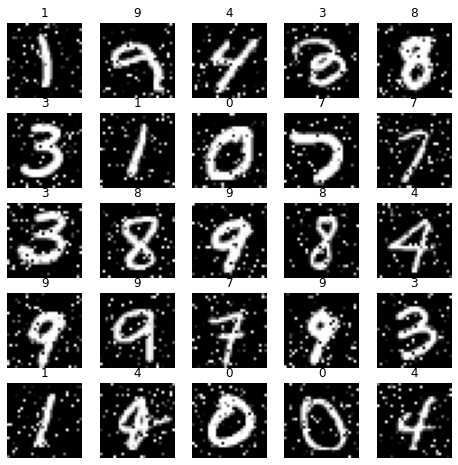

In [ ]:
#Visualizing the Noisy Images

#Defining the dimensions of the plot grid
wid1 = 5
len1 = 5 

fig, axes = plt.subplots(len1, wid1, figsize=(8,8))

axes = axes.ravel()#Flattens the matrix into arrays

n_training = len(train_x_n)#Length of the Training Data set

#Selecting a random number from 0 to n_training

for i in np.arange(0, wid1 * len1):
  index = np.random.randint(0, n_training)
  axes[i].imshow(train_x_n[index], cmap = 'gray')
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
  

###**Question 3 :**

Build & Train Auto-Encoder Deep Learning Model

In [ ]:
autoencoder = tf.keras.models.Sequential() #Building the model in a sequential fashion

#Encoder

autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape= (28, 28, 1)))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

#Decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

In [ ]:
print(val_x_n.shape, X_test.shape, train_x_n.shape, X_train.shape)

(10000, 28, 28) (10000, 28, 28) (60000, 28, 28) (60000, 28, 28)


In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit and train the model with 10 epochs and 200 batchsize
# Batch size refers to the number of training examples utilized in one iteration
# Epoch is the training samples pass through the learning algorithm simultaneously before weights are updated

autoencoder.fit(train_x_n.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs = 10,
                batch_size = 200,
                validation_data = (val_x_n.reshape(-1, 28, 28, 1),X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 14s 48ms/step - loss: 0.2376 - val_loss: 0.1037
Epoch 2/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0938 - val_loss: 0.0866
Epoch 3/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0855 - val_loss: 0.0829
Epoch 4/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0827 - val_loss: 0.0808
Epoch 5/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0811 - val_loss: 0.0798
Epoch 6/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0802 - val_loss: 0.0792
Epoch 7/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0797 - val_loss: 0.0788
Epoch 8/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0793 - val_loss: 0.0785
Epoch 9/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0790 - val_loss: 0.0782
Epoch 10/10
300/300 [==============================] - 15s 48ms/step - loss: 0.078

###**Question 4 :**

Evaluating the Trained Model Performance 

In [ ]:
evaluation = autoencoder.evaluate(val_x_n.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Loss:',evaluation)

313/313 [==============================] - 1s 4ms/step - loss: 0.0779
Test Loss: 0.07794221490621567


In [ ]:
predicted = autoencoder.predict(val_x_n[:10].reshape(-1, 28, 28, 1))

###**Question 5 :**

Visualize the Denoised Images using Matplotlib



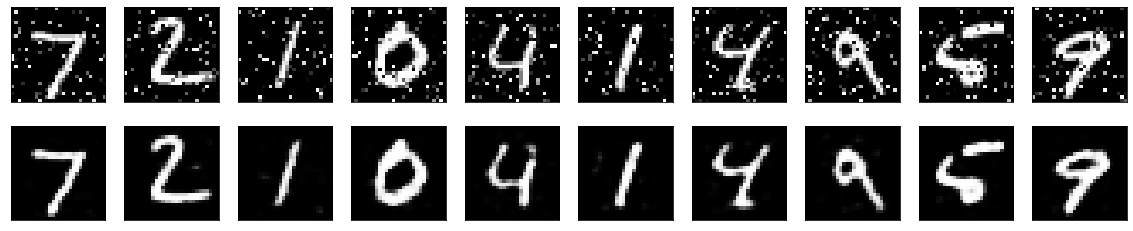

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, sharex=True, sharey=True, figsize = (20,4))

for images, row in zip([val_x_n[:10], predicted],axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)